# Assignment 4 - Predicting and Understanding Viewer Engagement with Educational Videos<br>

With the accelerating popularity of online educational experiences, the role of online lectures and other educational video continues to increase in scope and importance. Open access educational repositories such as <a href="http://videolectures.net/">videolectures.net</a>, as well as Massive Open Online Courses (MOOCs) on platforms like Coursera, have made access to many thousands of lectures and tutorials an accessible option for millions of people around the world. Yet this impressive volume of content has also led to a challenge in how to find, filter, and match these videos with learners. This assignment gives you an example of how machine learning can be used to address part of that challenge.  

<br>

## About the prediction problem<br>

One critical property of a video is engagement: how interesting or "engaging" it is for viewers, so that they decide to keep watching. Engagement is critical for learning, whether the instruction is coming from a video or any other source. There are many ways to define engagement with video, but one common approach is to estimate it by measuring how much of the video a user watches. If the video is not interesting and does not engage a viewer, they will typically abandon it quickly, e.g. only watch 5% or 10% of the total.  
<br>
A first step towards providing the best-matching educational content is to understand which features of educational material make it engaging for learners in general. This is where predictive modeling can be applied, via supervised machine learning. For this assignment, your task is to predict how engaging an educational video is likely to be for viewers, based on a set of features extracted from the video's transcript, audio track, hosting site, and other sources.  
<br>
We chose this prediction problem for several reasons:  
<br>
* It combines a variety of features derived from a rich set of resources connected to the original data
* The manageable dataset size means the dataset and supervised models for it can be easily explored on a wide variety of computing platforms
* Predicting popularity or engagement for a media item, especially combined with understanding which features contribute to its success with viewers, is a fun problem but also a practical representative application of machine learning in a number of business and educational sectors.  

<br>

## About the dataset<br>

We extracted training and test datasets of educational video features from the VLE Dataset put together by researcher Sahan Bulathwela at University College London.  
<br>
We provide you with two data files for use in training and validating your models: [train.csv](train.csv) and [test.csv](test.csv). Each row in these two files corresponds to a single educational video, and includes information about diverse properties of the video content as described further below. The target variable is `engagement` which was defined as `True` if the median percentage of the video watched across all viewers was at least 30%, and `False` otherwise.  
<br>
Note: Any extra variables that may be included in the training set are simply for your interest if you want an additional source of data for visualization, or to enable unsupervised and semi-supervised approaches. However, they are not included in the test set and thus cannot be used for prediction. **Only the data already included in your Coursera directory can be used for training the model for this assignment.**  
<br>
For this final assignment, you will bring together what you've learned across all four weeks of this course, by exploring different prediction models for this new dataset. In addition, we encourage you to apply what you've learned about model selection to do hyperparameter tuning using training/validation splits of the training data, to optimize the model and further increase its performance. In addition to a basic evaluation of model accuracy, we've also provided a utility function to visualize which features are most and least contributing to the overall model performance.  
<br>
**File descriptions**<br> 
[train.csv](train.csv) - the training set (Use only this data for training your model!)<br>
[test.csv](test.csv)   - the test set  
<br>
**Data fields**<br>
[train.csv](train.csv) & [test.csv](test.csv):  

    title_word_count - the number of words in the title of the video.
    
    document_entropy - a score indicating how varied the topics are in the video, based on the transcript. Videos with smaller entropy scores will tend to be more cohesive and more focused  on a single topic.
    
    freshness - The number of days elapsed between 01/01/1970 and the lecture published date. Videos that are more recent will have higher freshness values.
    
    easiness - A text difficulty measure applied to the transcript. A lower score indicates more complex language used by the presenter.
    
    fraction_stopword_presence - A stopword is a very common word like 'the' or 'and'. This feature computes the fraction of all words that are stopwords in the video lecture transcript.
    
    speaker_speed - The average speaking rate in words per minute of the presenter in the video.
    
    silent_period_rate - The fraction of time in the lecture video that is silence (no speaking).
    
[train.csv](train.csv) only:
    
    engagement - Target label for training. True if learners watched a substantial portion of the video (see description), or False otherwise.
    
<br>

## Evaluation<br>

Your predictions will be given as the probability that the corresponding video will be engaging to learners.  
<br>
The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).  
<br>
Your grade will be based on the AUC score computed for your classifier. A model with an AUC (area under ROC curve) of at least 0.8 passes this assignment, and over 0.85 will receive full points.  
<br>

___
<br>

For this assignment, create a function that trains a model to predict significant learner engagement with a video using [train.csv](train.csv). Using this model, return a Pandas Series object of length 2309 with the data being the probability that each corresponding video from [test.csv](test.csv) will be engaging (according to a model learned from the `engagement` label in the training set), and the video index being in the `id` field.  
<br>
Example:

    id
       9240    0.401958
       9241    0.105928
       9242    0.018572
                 ...
       9243    0.208567
       9244    0.818759
       9245    0.018528
             ...
       Name: engagement, dtype: float32
       
<br>

### Hints<br>

* Make sure your code is working before submitting it to the autograder.

* Print out and check your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. 

* Try to avoid global variables. If you have other functions besides `engagement_model`, you should move those functions inside the scope of `engagement_model`.

* Be sure to first check the pinned threads in Week 4's discussion forum if you run into a problem you can't figure out.

<br>

### Extensions<br>

If this prediction task motivates you to explore further, you can find more details here on the original VLE dataset and others related to video engagement: https://github.com/sahanbull/VLE-Dataset

## Personal Notes<br>

Some of these notes are relevant sections or figures from the README file given in the above [GitHub](https://github.com/sahanbull/VLE-Dataset) page or from related publications / external sites. Other notes are observations of the data I've made while working with the dataset. This [paper](https://files.eric.ed.gov/fulltext/ED624094.pdf) by S. Bulathwela et al. (S. Bulathwela is the owner of the GitHub page) appears to be the publication which introduces the VLE dataset. Videos in this dataset range from scientific talks and expert panels to MOOC-like lectures.  
<br>
A compilation of descriptions of some of the features (not including "speaker_speed" or "silent_period_rate") can be found [here](features.jpg).  
<br>
 - **Title_word_count:** The number of words in the title  
<br>
<br>
 - **Document_entropy:** Calculated over every word $w$ in the transcript via:  
 $\mathrm{Document\ Entropy} = -\sum_{w} p(w_i) \cdot \log_2[p(w_i)]$  
 $p(w_i)=\frac{\mathrm{count}(w_i)}{\mathrm{Total\ Word\ Count}}$  
 $p(w_i)$ is the probability of word $w_i$ computed using a maximum likelihood estimate [[ref](https://people.cs.umass.edu/~yanlei/publications/wsdm11.pdf)]  
 Document entropy, by definition, cannot go below 0. At a value of 0, all of the words are identical; there is one unique word.  
<br>
<br>
 - **Freshness:** Measured in "days." There is a region of feature space around 16650 days with little to no data.  
<br>
<br>
 - **Easiness:** This is the Flesch-Kincaid easiness readability score (FK Easiness). The highest (easiest) readability score possible is 121.22 (a lone one-syllable word constituting a single sentence; leading to 1 entry in the training dataset being cut due to an (very slightly) impossibly high value). There is no theoretical lower bound. [[ref](https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests)]  
 $\mathrm{FK\ Easiness} = 206.835 - 1.015(\frac{\mathrm{Total\ Word\ Count}}{\mathrm{Sentence\ Count}}) - 84.6(\frac{\mathrm{Syllable\ Count}}{\mathrm{Total\ Word\ Count}})$  
 If there is a `ZeroDivisionError`, an "easiness" of 100.0 is returned.  
<br>
<br>
 - **Fraction_stopword_presence:** Words considered to be "stopwords" ($sw$) can be seen [here](tokens.jpg). Fraction should fall between 0 and 1. If there are no words in the transcript, this values is set to 0.  
 $\mathrm{Fraction\ Stopword\ Presence} = \frac{\mathrm{count}(sw)}{\mathrm{Total\ Word\ Count}}$
<br>
<br>
 - **Speaker_speed:** Upon initial examination of this feature's values, they seem incorrect either in value or in units (said to be "words per minute") as the median and mean of the values is ~2.3-2.5, which is incredibly low for "words per minute." This is confirmed by looking at the [full VLE dataset](VLE_12k_dataset_v1.csv) as given on the above [GitHub](https://github.com/sahanbull/VLE-Dataset) page. I initially suspected that the speaker speed is actually given in "words per second" given that the lecture "duration" feature (which is not included in [train.csv](train.csv) but is included in the full VLE dataset) is given in units of "seconds" on the GitHub page and in the most directly related paper to the VLE dataset, S. Bulathwela et al. (2022). [[ref](https://files.eric.ed.gov/fulltext/ED624094.pdf)] Looking into this, in the paper originally cited by S. Bulathwela for "speaker speed" (P.J. Guo et al. (2014)), the lecture "duration" and "speaker speed" look to be given in "minutes," not "seconds." [[ref](http://up.csail.mit.edu/other-pubs/las2014-pguo-engagement.pdf)] In the first paper by S. Bulathwela et al. (2020) to use/reference this "speaker speed," (the paper which also defines "silent_period_rate" below) [[ref](https://files.eric.ed.gov/fulltext/ED607999.pdf)] "speaker_speed" is said to be "per minute," suggesting a change in units in the aforementioned latest paper by S. Bulathwela et al. (2022), the paper which introduces the VLE dataset, in which the lecture "duration" is now in "seconds." [[ref](https://files.eric.ed.gov/fulltext/ED624094.pdf)] Upon further inspection of the full VLE dataset, the lecture "duration" feature does indeed appear to be in units of "seconds" with the "speaker speed" feature calculated as "word count" / "duration" (both referring to the entire lecture and both not included in [train.csv](train.csv)), giving units of "words per second." Therefore, I have converted this feature to units of "words per minute" (wpm) in this assignment.  
Significantly high outliers (see [histogram](speaker_speed_histogram_full_training_set.png) of full training set) may be due to videos at $> 1\times$ playback speed, the original language being non-English, or multiple people talking simultaneously? Unfortunately, I see no feature in the full dataset representing video playback speed. With additionally not having access to the videos or transcripts, it is hard to tell why I am seeing entries with such high "speaker speeds." This, in turn, makes it very difficult to properly define, make, and justify cuts based on this feature. The highest "speaker_speed" in the training set is 3051 wpm.  
<br>
<br>
 - **Silent_period_rate (SPR):** There are a lot of entries (3671 / 9239 in the training set) with a value of 0 for this feature. Given that this feature represents the "fraction of time in the video that is silence," 0 is an acceptable value, but the high prevelance of this value seems suspicious. Generally speaking, it can be seen that as "speaker_speed" increases, "silent_period_rate" decreases. However, numerous entries with 0 "silent_period_rate" exist across the range of "speaker_speed" values as seen in this [histogram](speaker_speed_histogram_for_entries_with_0_SPR.png) of training sample "speaker_speeds" (arbitrarily limited in the histogram to those videos with < 400 wpm). At typical "speaker_speeds," (~ 140 wpm) I can envision, for example, 0 "SPR" values resulting from lectures with continuous talking without breaks. I can also envision nonzero "SPR" values at the same fixed "speaker_speed" (given as "word count" / "duration") resulting from someone actually talking faster but with including breaks in the lecture (assuming similar lecture "duration" and thus "word_count"). However, while low in number of instances, 0 "SPR" values corresponding to samples with very low "speaker_speed" are suspicious and suggest transcripts that don't have the "silence" tags used to calculate this feature (see below) or the presence of something, like music, in the video preventing the use of "silence" tags. Equally suspicious are the small number of entries with high "speaker_speed" ($\gtrsim$ 200 wpm) and high "SPR," (~ 0.3 SPR on average; see feature [pairwise plot](video_engagement_feature_pairwise_plot.png) for training samples with "speaker_speed" < 400 wpm) which could suggest videos with $> 1\times$ playback speed. Without access to the videos or transcripts, it is hard to tell why I am seeing entries in these portions of feature space. This, in turn, makes it very difficult to properly define, make, and justify cuts based on this feature and possibly the "speaker_speed" feature. Additionally, there are 10 entries where the "silent_period_rate" > 1, which should be impossible, and these are removed. The "silent_period_rate" is calculated using the special tags in the video transcripts that indicate silence. For a lecture $l$: [[ref](https://files.eric.ed.gov/fulltext/ED607999.pdf)]  
 $\mathrm{SPR}(l) = \frac{1}{D(l)} \sum_{t} D(t) \cdot I(N(t) = \mathrm{"silence"})$  
 $t$ is a tag in the collection of tags $T(l)$ that bleong to lecture $l$  
 $N$ returns the type of tag $t$  
 $D$ returns the druation of tag $t$ or lecture $l$  
 $I()$ is the indicator function returning 1 when the condition is verified and 0 otherwise
<br>
<br>

**Unfortunately, I do not have access to the videos or transcripts used to create this VLE dataset, making it challenging without more literature exploration, etc. to resolve some of the issues presented here.**

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

## Read in full VLE source dataset
vle = pd.read_csv('VLE_12k_dataset_v1.csv')
vle = vle.set_index('id')

print('Mean speaker speed: {:.3f}'.format(vle['speaker_speed'].mean()))
print('Median speaker speed: {:.3f}'.format(vle['speaker_speed'].median()))
print('Number of 0 entries for silent period rate: {}'.format(len(vle[vle['silent_period_rate'] == 0])))

## Split the VLE dataset into the same train and test sets used in this assignment
train_portion = vle.iloc[:9239]
test_portion  = vle.iloc[9239:]

## The lecture "durations" do appear to be given in seconds.
## Creating another "speaker speed" column (units: words per second) by dividing the lecture "word count" by the lecture "duration"
## This will be compared to the "speaker_speed" column  of the dataset in "train.csv" (they are the same)
train_portion['speaker_speed_test'] = train_portion['word_count'] / train_portion['duration']

## Recreate the Boolean "engagement" target column in "train.csv" using the criteria given in the assignment description
## This will be compared to the dataset in "train.csv" to ensure they are the same (they are)
## Create a Boolean "engagement" column for the test set to later check the ROC AUC score of the prediction model
train_portion['engagement'] = [True if x >= 0.3 else False for x in train_portion['med_engagement']]
test_portion['engagement']  = [True if x >= 0.3 else False for x in test_portion['med_engagement']]

print('\n\n')
print('Full VLE dataset:')
display(vle)
print('Recreated training dataset:')
display(train_portion)
print('Recreated test dataset:')
display(test_portion)
print('\n\n')

## Looking at certain entries with feature values at the extremes of their ranges

## Converting the "speaker_speed" from words per second to words per minute
train_portion['speaker_speed'] = train_portion['speaker_speed'] * 60.

cols = [
    'word_count', 
    'duration', 
    'speaker_speed', 
    'silent_period_rate',
    'document_entropy', 
    'fraction_stopword_presence', 
    'title_word_count', 
    'freshness', 
    'easiness', 
    'engagement'
]
## There are 10 instances where the "silent_period_rate" > 1. While I can potentially see a reasoning behind this,
## I don't have access to the videos or transcripts to confirm or deny anything.
## Since I would expect the maximum value allowed, by definition, to be 1, for simplicity I am removing these entries.
print('Silent period rate >= 1')
display(train_portion[train_portion['silent_period_rate'] >= 1.][cols])

## On the surface, nothing seems necessarily "incorrect." 
## There are 2 instances, one with 1 total word and, by definition, 0 document entropy. 
## This instance does have an "easiness" score slightly above the maximum threshold of 121.22
## The other instance has 6 total words. If these are all the same word, then by defition, 0 document entropy
## I will remove the instance with the "easiness" score exceeding the maximum possible value but keep the other instance.
print('Document entropy = 0')
display(train_portion[train_portion['document_entropy'] == 0.][cols])

## Given that the 6 instances here all have 6 or fewer total words, a "fraction_stopword_presence" of 0 or 1 seems reasonable.
## As a side note, 4 of these instances have 0 as their "silence_period_rate," suggesting something went wrong in this feature's calculation
## or a lack of "silence" tags in the transcript, which are necessary to calculate the SPR
## Maybe music in the presentation plays a role in preventing the use of the "silence" tags?
print('Fraction stopword presence = 0 or 1')
display(train_portion[(train_portion['fraction_stopword_presence'] == 0.) | (train_portion['fraction_stopword_presence'] == 1.)][cols])

## There are 158 instances meeting this somewhat arbitrary condition. 
## A quick Google search suggests English speakers speak on average ~150 words per minute.
## Other languages, like Spanish or Japanese, are spoken faster, but below this conservative threshold of 400 words per minute.
## Since there are several instances with very large "speaker_speeds" (>1000 words per minute), my concern is that these extreme values
## might correspond to videos that had playback >1x speed or some other issue.  For now, I am retaining these values in case the 
## videos did indeed have >1x playback speed and this was intentional (I do not know one way or another)
print('Speaker speed > 400 words per minute')
print('Number of entries: {}'.format(train_portion[train_portion['speaker_speed'] > 400].shape[0]))
display(train_portion[train_portion['speaker_speed'] > 400][cols])

## There is 1 instance here of a lecture with a word count of 1 and an easiness score of 122.032, slightly above the maximum threshold of 121.22
## The maximum threshold of 121.22 is derived from one sentence comprised of one one-syllable word
## I will remove this entry
print('Easiness > 121.22')
display(train_portion[train_portion['easiness'] > 121.22][cols])

## There are 3671 instances of this. Without the videos or transcripts, 
## I don't have a good justification to remove these as a whole or by section of feature space 
## I did not check each instance of this, but from the section of the DataFrame displayed, 
## the other feature values generally seem to be alright.
print('Silent period rate = 0')
display(train_portion[train_portion['silent_period_rate'] == 0.][cols])

# fig, ax = plt.subplots()
# ax.hist(train_portion['speaker_speed'], bins=500)
# ax.set_xlabel('Speaker Speed (Words per Minute)')
# ax.set_ylabel('Count')
# ax.set_title('Training Samples')
# ax.minorticks_on()
# plt.show()

Mean speaker speed: 2.496
Median speaker speed: 2.266
Number of 0 entries for silent period rate: 4612



Full VLE dataset:


/tmp/ipykernel_3621/1877375171.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_portion['speaker_speed_test'] = train_portion['word_count'] / train_portion['duration']
/tmp/ipykernel_3621/1877375171.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_portion['engagement'] = [True if x >= 0.3 else False for x in train_portion['med_engagement']]
/tmp/ipykernel_3621/1877375171.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,fold,categories,word_count,title_word_count,document_entropy,easiness,fraction_stopword_presence,fraction_stopword_coverage,preposition_rate,auxiliary_rate,tobe_verb_rate,conjugate_rate,normalization_rate,pronoun_rate,freshness,auth_topic_rank_1_url,auth_topic_rank_1_score,auth_topic_rank_2_url,auth_topic_rank_2_score,auth_topic_rank_3_url,auth_topic_rank_3_score,auth_topic_rank_4_url,auth_topic_rank_4_score,auth_topic_rank_5_url,auth_topic_rank_5_score,coverage_topic_rank_1_url,coverage_topic_rank_1_score,coverage_topic_rank_2_url,coverage_topic_rank_2_score,coverage_topic_rank_3_url,coverage_topic_rank_3_score,coverage_topic_rank_4_url,coverage_topic_rank_4_score,coverage_topic_rank_5_url,coverage_topic_rank_5_score,duration,speaker_speed,has_parts,type,silent_period_rate,min_engagement,max_engagement,med_engagement,mean_engagement,sd_engagement,num_learners,num_views,avg_star_rating,num_star_ratings
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,stem,2668,9,7.753995,75.583936,0.553664,0.428135,0.121392,0.013323,0.035159,0.033309,0.034049,0.089563,16310,http://en.wikipedia.org/wiki/Population_density,0.007025,http://en.wikipedia.org/wiki/Mixture_model,0.005028,http://en.wikipedia.org/wiki/Kernel_density_es...,0.004468,http://en.wikipedia.org/wiki/Overfitting,0.004435,http://en.wikipedia.org/wiki/Bandwidth_(signal...,0.004015,http://en.wikipedia.org/wiki/Kernel_density_es...,0.414578,http://en.wikipedia.org/wiki/Time,0.354094,http://en.wikipedia.org/wiki/Mixture_model,0.348874,http://en.wikipedia.org/wiki/Likelihood_function,0.348466,http://en.wikipedia.org/wiki/Scientific_method,0.347893,890,2.997753,False,vl,0.000000,0.030241,1.000000,0.502923,1.000000,1.574152,53,1899,-1.0,0
2,1,misc,7512,6,8.305269,86.870523,0.584498,0.602446,0.095885,0.014363,0.036749,0.030668,0.018763,0.103002,15410,http://en.wikipedia.org/wiki/Interest_rate,0.008482,http://en.wikipedia.org/wiki/Opportunity_cost,0.007073,http://en.wikipedia.org/wiki/Net_present_value,0.006297,http://en.wikipedia.org/wiki/Present_value,0.003778,http://en.wikipedia.org/wiki/Pension,0.003687,http://en.wikipedia.org/wiki/Interest_rate,0.292437,http://en.wikipedia.org/wiki/Present_value,0.242971,http://en.wikipedia.org/wiki/Money,0.188241,http://en.wikipedia.org/wiki/Net_present_value,0.178869,http://en.wikipedia.org/wiki/Opportunity_cost,0.167901,2850,2.635789,False,vl,0.000000,0.008136,1.000000,0.011989,0.165811,0.368124,7,1982,-1.0,0
3,1,stem,4264,3,7.965583,81.915968,0.605685,0.525994,0.118294,0.019028,0.037827,0.033242,0.030720,0.124255,15680,http://en.wikipedia.org/wiki/Topic_model,0.011175,http://en.wikipedia.org/wiki/Softmax_function,0.005259,http://en.wikipedia.org/wiki/Additive_smoothing,0.005177,http://en.wikipedia.org/wiki/Probability,0.003485,http://en.wikipedia.org/wiki/Calcium,0.002749,http://en.wikipedia.org/wiki/Normal_distribution,0.271424,http://en.wikipedia.org/wiki/Probability,0.270897,http://en.wikipedia.org/wiki/Model_(person),0.257409,http://en.wikipedia.org/wiki/Additive_smoothing,0.218994,http://en.wikipedia.org/wiki/Regression_analysis,0.218099,1680,2.538095,False,vit,0.000000,0.009563,1.000000,0.041627,0.199148,0.358510,39,3561,5.0,1
4,1,stem,2869,9,8.142877,80.148937,0.593664,0.504587,0.122590,0.023416,0.046832,0.042700,0.016873,0.104339,15610,http://en.wikipedia.org/wiki/PageRank,0.017086,http://en.wikipedia.org/wiki/Matrix_(mathematics),0.003996,http://en.wikipedia.org/wiki/Adjacency_matrix,0.003391,http://en.wikipedia.org/wiki/Physics,0.003353,http://en.wikipedia.org/wiki/Markov_chain,0.002940,http://en.wikipedia.org/wiki/Matrix_(mathematics),0.308092,http://en.wikipedia.org/wiki/Physics,0.296618,http://en.wikipedia.org/wiki/Quantum_mechanics,0.267358,http://en.wikipedia.org/wiki/Markov_chain,0.259458,http://en.wikipedia.org/wiki/PageRank,0.200800,1270,2.259055,False,vl,0.000000,0.016787,1.000000,0.064989,0.317020,0.662013,36,3030,-1.0,0
5,1,misc,4840,9,8.161250,76.907549,0.581637,0.559633,0.130700,0.021173,0.038884,0.041531,0.023412

Recreated training dataset:


,fold,categories,word_count,title_word_count,document_entropy,easiness,fraction_stopword_presence,fraction_stopword_coverage,preposition_rate,auxiliary_rate,tobe_verb_rate,conjugate_rate,normalization_rate,pronoun_rate,freshness,auth_topic_rank_1_url,auth_topic_rank_1_score,auth_topic_rank_2_url,auth_topic_rank_2_score,auth_topic_rank_3_url,auth_topic_rank_3_score,auth_topic_rank_4_url,auth_topic_rank_4_score,auth_topic_rank_5_url,auth_topic_rank_5_score,coverage_topic_rank_1_url,coverage_topic_rank_1_score,coverage_topic_rank_2_url,coverage_topic_rank_2_score,coverage_topic_rank_3_url,coverage_topic_rank_3_score,coverage_topic_rank_4_url,coverage_topic_rank_4_score,coverage_topic_rank_5_url,coverage_topic_rank_5_score,duration,speaker_speed,has_parts,type,silent_period_rate,min_engagement,max_engagement,med_engagement,mean_engagement,sd_engagement,num_learners,num_views,avg_star_rating,num_star_ratings,speaker_speed_test,engagement
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,stem,2668,9,7.753995,75.583936,0.553664,0.428135,0.121392,0.013323,0.035159,0.033309,0.034049,0.089563,16310,http://en.wikipedia.org/wiki/Population_density,0.007025,http://en.wikipedia.org/wiki/Mixture_model,0.005028,http://en.wikipedia.org/wiki/Kernel_density_es...,0.004468,http://en.wikipedia.org/wiki/Overfitting,0.004435,http://en.wikipedia.org/wiki/Bandwidth_(signal...,0.004015,http://en.wikipedia.org/wiki/Kernel_density_es...,0.414578,http://en.wikipedia.org/wiki/Time,0.354094,http://en.wikipedia.org/wiki/Mixture_model,0.348874,http://en.wikipedia.org/wiki/Likelihood_function,0.348466,http://en.wikipedia.org/wiki/Scientific_method,0.347893,890,2.997753,False,vl,0.000000,0.030241,1.0,0.502923,1.000000,1.574152,53,1899,-1.0,0,2.997753,True
2,1,misc,7512,6,8.305269,86.870523,0.584498,0.602446,0.095885,0.014363,0.036749,0.030668,0.018763,0.103002,15410,http://en.wikipedia.org/wiki/Interest_rate,0.008482,http://en.wikipedia.org/wiki/Opportunity_cost,0.007073,http://en.wikipedia.org/wiki/Net_present_value,0.006297,http://en.wikipedia.org/wiki/Present_value,0.003778,http://en.wikipedia.org/wiki/Pension,0.003687,http://en.wikipedia.org/wiki/Interest_rate,0.292437,http://en.wikipedia.org/wiki/Present_value,0.242971,http://en.wikipedia.org/wiki/Money,0.188241,http://en.wikipedia.org/wiki/Net_present_value,0.178869,http://en.wikipedia.org/wiki/Opportunity_cost,0.167901,2850,2.635789,False,vl,0.000000,0.008136,1.0,0.011989,0.165811,0.368124,7,1982,-1.0,0,2.635789,False
3,1,stem,4264,3,7.965583,81.915968,0.605685,0.525994,0.118294,0.019028,0.037827,0.033242,0.030720,0.124255,15680,http://en.wikipedia.org/wiki/Topic_model,0.011175,http://en.wikipedia.org/wiki/Softmax_function,0.005259,http://en.wikipedia.org/wiki/Additive_smoothing,0.005177,http://en.wikipedia.org/wiki/Probability,0.003485,http://en.wikipedia.org/wiki/Calcium,0.002749,http://en.wikipedia.org/wiki/Normal_distribution,0.271424,http://en.wikipedia.org/wiki/Probability,0.270897,http://en.wikipedia.org/wiki/Model_(person),0.257409,http://en.wikipedia.org/wiki/Additive_smoothing,0.218994,http://en.wikipedia.org/wiki/Regression_analysis,0.218099,1680,2.538095,False,vit,0.000000,0.009563,1.0,0.041627,0.199148,0.358510,39,3561,5.0,1,2.538095,False
4,1,stem,2869,9,8.142877,80.148937,0.593664,0.504587,0.122590,0.023416,0.046832,0.042700,0.016873,0.104339,15610,http://en.wikipedia.org/wiki/PageRank,0.017086,http://en.wikipedia.org/wiki/Matrix_(mathematics),0.003996,http://en.wikipedia.org/wiki/Adjacency_matrix,0.003391,http://en.wikipedia.org/wiki/Physics,0.003353,http://en.wikipedia.org/wiki/Markov_chain,0.002940,http://en.wikipedia.org/wiki/Matrix_(mathematics),0.308092,http://en.wikipedia.org/wiki/Physics,0.296618,http://en.wikipedia.org/wiki/Quantum_mechanics,0.267358,http://en.wikipedia.org/wiki/Markov_chain,0.259458,http://en.wikipedia.org/wiki/PageRank,0.200800,1270,2.259055,False,vl,0.000000,0.016787,1.0,0.064989,0.317020,0.662013,36,3030,-1.0,0,2.259055,False
5,1,misc,4840,9,8.161250,7

Recreated test dataset:


,fold,categories,word_count,title_word_count,document_entropy,easiness,fraction_stopword_presence,fraction_stopword_coverage,preposition_rate,auxiliary_rate,tobe_verb_rate,conjugate_rate,normalization_rate,pronoun_rate,freshness,auth_topic_rank_1_url,auth_topic_rank_1_score,auth_topic_rank_2_url,auth_topic_rank_2_score,auth_topic_rank_3_url,auth_topic_rank_3_score,auth_topic_rank_4_url,auth_topic_rank_4_score,auth_topic_rank_5_url,auth_topic_rank_5_score,coverage_topic_rank_1_url,coverage_topic_rank_1_score,coverage_topic_rank_2_url,coverage_topic_rank_2_score,coverage_topic_rank_3_url,coverage_topic_rank_3_score,coverage_topic_rank_4_url,coverage_topic_rank_4_score,coverage_topic_rank_5_url,coverage_topic_rank_5_score,duration,speaker_speed,has_parts,type,silent_period_rate,min_engagement,max_engagement,med_engagement,mean_engagement,sd_engagement,num_learners,num_views,avg_star_rating,num_star_ratings,engagement
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9240,5,misc,10137,6,8.548351,89.827395,0.640810,0.730887,0.127641,0.014375,0.056729,0.040039,0.017945,0.130632,14140,http://en.wikipedia.org/wiki/Suicide,0.003126,http://en.wikipedia.org/wiki/Sodomy,0.002396,http://en.wikipedia.org/wiki/Rhetoric,0.001535,http://en.wikipedia.org/wiki/Flemish_people,0.001327,http://en.wikipedia.org/wiki/Soul_music,0.001274,http://en.wikipedia.org/wiki/Nature,0.385236,http://en.wikipedia.org/wiki/Human,0.383661,http://en.wikipedia.org/wiki/Death,0.375016,http://en.wikipedia.org/wiki/Religion,0.357955,http://en.wikipedia.org/wiki/Life,0.353765,4480,2.262723,False,vl,0.000000,0.004170,1.000000,0.012631,0.126072,0.285092,12,2412,-1.0,0,False
9241,5,stem,3067,8,7.730110,82.446667,0.606738,0.474006,0.091940,0.017003,0.036839,0.031171,0.027708,0.140743,14600,http://en.wikipedia.org/wiki/Loss_function,0.005993,http://en.wikipedia.org/wiki/Probability,0.004781,http://en.wikipedia.org/wiki/Expected_value,0.004652,http://en.wikipedia.org/wiki/Conditional_proba...,0.003771,http://en.wikipedia.org/wiki/Machine_learning,0.003409,http://en.wikipedia.org/wiki/Loss_function,0.284486,http://en.wikipedia.org/wiki/Scientific_method,0.281328,http://en.wikipedia.org/wiki/Conditional_proba...,0.273371,http://en.wikipedia.org/wiki/Expected_value,0.271776,http://en.wikipedia.org/wiki/Pi,0.265764,1140,2.690351,False,vl,0.000000,0.014339,1.000000,0.096375,0.265645,0.348919,34,3723,-1.0,0,False
9242,5,stem,8725,3,8.200887,88.821542,0.621089,0.626911,0.104413,0.021203,0.035874,0.035874,0.009857,0.153926,16980,http://en.wikipedia.org/wiki/Compiler,0.004699,http://en.wikipedia.org/wiki/Source_code,0.004226,http://en.wikipedia.org/wiki/Software_bug,0.002712,http://en.wikipedia.org/wiki/Open-source_software,0.002618,http://en.wikipedia.org/wiki/Random_number_gen...,0.002605,http://en.wikipedia.org/wiki/Software_bug,0.319839,http://en.wikipedia.org/wiki/Source_code,0.293913,http://en.wikipedia.org/wiki/Compiler,0.264618,http://en.wikipedia.org/wiki/Time,0.245514,http://en.wikipedia.org/wiki/Science,0.241972,2800,3.116071,False,vl,0.000000,0.005643,0.983215,0.021385,0.188638,0.316877,15,1095,-1.0,0,False
9243,5,stem,227,5,6.377299,86.874660,0.600000,0.162080,0.121739,0.017391,0.060870,0.047826,0.004348,0.104348,16260,http://en.wikipedia.org/wiki/Brain,0.028873,http://en.wikipedia.org/wiki/Alcohol,0.008782,http://en.wikipedia.org/wiki/Knowledge,0.008000,http://en.wikipedia.org/wiki/University,0.006080,http://en.wikipedia.org/wiki/Science,0.006034,http://en.wikipedia.org/wiki/Brain,0.348979,http://en.wikipedia.org/wiki/Knowledge,0.334055,http://en.wikipedia.org/wiki/Science,0.274886,http://en.wikipedia.org/wiki/Time,0.240425,http://en.wikipedia.org/wiki/Technology,0.237444,80,2.837500,False,vps,0.017994,0.201161,1.000000,0.720460,0.745913,0.474789,22,2127,-1.0,0,True
9244,5,stem,2100,18,7.756530,88.872277,0.616105,0.443425,0.099719,0.029026,0.030431,0.031367,0.033240,0.120318,14030,http://en.wikipedia.org/wiki/Metadata,0.011215,http://en.wikipedia.org/wiki/Semantic_comp




Silent period rate >= 1


/tmp/ipykernel_3621/1877375171.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_portion['speaker_speed'] = train_portion['speaker_speed'] * 60.


,word_count,duration,speaker_speed,silent_period_rate,document_entropy,fraction_stopword_presence,title_word_count,freshness,easiness,engagement
id,,,,,,,,,,
72,50,500,6.000000,1.080706,3.896175,0.820000,4,15130,113.352417,False
2516,92,1100,5.018182,1.012851,1.998094,0.304348,4,14890,120.277879,False
2600,217,5520,2.358696,1.008495,0.996586,0.170507,4,14490,121.215301,False
2612,44,1140,2.315789,1.040591,0.761250,0.111111,4,14820,121.196395,False
4665,35,1660,1.265060,1.069354,2.214540,0.457143,5,14820,121.190147,False
7056,42,670,3.761194,1.125718,2.890474,0.595238,8,14820,120.712500,False
7499,18,680,1.588235,1.168239,0.309543,0.055556,14,14820,121.160294,False
7649,31,1060,1.754717,1.056907,2.157079,0.225806,7,14820,118.420968,False
9158,117,1090,6.440367,1.019028,3.610622,0.694915,6,14820,120.402063,False


Document entropy = 0


,word_count,duration,speaker_speed,silent_period_rate,document_entropy,fraction_stopword_presence,title_word_count,freshness,easiness,engagement
id,,,,,,,,,,
2455,6,710,0.507042,0.999203,0.0,0.0,8,14820,121.017,False
4604,1,3310,0.018127,0.751323,0.0,1.0,3,15900,122.032,False


Fraction stopword presence = 0 or 1


,word_count,duration,speaker_speed,silent_period_rate,document_entropy,fraction_stopword_presence,title_word_count,freshness,easiness,engagement
id,,,,,,,,,,
1483,6,300,1.200000,0.000000,2.584963,0.0,4,14490,120.7125,True
2455,6,710,0.507042,0.999203,0.000000,0.0,8,14820,121.0170,False
4604,1,3310,0.018127,0.751323,0.000000,1.0,3,15900,122.0320,False
5870,6,980,0.367347,0.000000,2.584963,0.0,6,13990,120.7125,False
6141,6,2750,0.130909,0.000000,2.584963,0.0,8,13920,120.7125,False
6999,3,60,3.000000,0.000000,0.918296,1.0,8,14030,120.7125,True


Speaker speed > 400 words per minute
Number of entries: 158


,word_count,duration,speaker_speed,silent_period_rate,document_entropy,fraction_stopword_presence,title_word_count,freshness,easiness,engagement
id,,,,,,,,,,
29,39776,4010,595.152120,0.164464,8.564868,0.612629,10,14680,84.836576,False
131,34429,5040,409.869048,0.389408,8.389986,0.643292,3,14860,91.545072,False
150,50080,3210,936.074767,0.274152,8.431722,0.632010,9,13950,89.941520,False
172,33034,3780,524.349206,0.074471,8.230668,0.606195,2,15960,87.832164,False
184,51376,4100,751.843903,0.172298,8.389281,0.612767,6,14500,84.883900,False
...,...,...,...,...,...,...,...,...,...,...
8812,40824,2520,972.000000,0.153006,8.428595,0.653565,5,14810,85.041277,False
8902,9564,1040,551.769231,0.045501,8.011071,0.664850,17,17140,83.182460,False
9039,26886,3630,444.396694,0.000000,8.459326,0.597964,4,16310,82.449893,False


Easiness > 121.22


,word_count,duration,speaker_speed,silent_period_rate,document_entropy,fraction_stopword_presence,title_word_count,freshness,easiness,engagement
id,,,,,,,,,,
4604,1,3310,0.018127,0.751323,0.0,1.0,3,15900,122.032,False


Silent period rate = 0


,word_count,duration,speaker_speed,silent_period_rate,document_entropy,fraction_stopword_presence,title_word_count,freshness,easiness,engagement
id,,,,,,,,,,
1,2668,890,179.865169,0.0,7.753995,0.553664,9,16310,75.583936,True
2,7512,2850,158.147368,0.0,8.305269,0.584498,6,15410,86.870523,False
3,4264,1680,152.285714,0.0,7.965583,0.605685,3,15680,81.915968,False
4,2869,1270,135.543307,0.0,8.142877,0.593664,9,15610,80.148937,False
5,4840,2000,145.200000,0.0,8.161250,0.581637,9,14920,76.907549,False
...,...,...,...,...,...,...,...,...,...,...
9228,2035,700,174.428571,0.0,8.054442,0.584815,8,16310,85.909198,True
9229,2784,1550,107.767742,0.0,7.763797,0.621822,8,16180,83.535876,False
9231,2089,910,137.736264,0.0,7.679210,0.621386,10,15680,78.546142,False


Training DataFrame:
Shape: (9239, 10)


,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate,engagement
0,1,9,7.753995,16310,75.583936,0.553664,0.034049,2.997753,0.0,True
1,2,6,8.305269,15410,86.870523,0.584498,0.018763,2.635789,0.0,False
2,3,3,7.965583,15680,81.915968,0.605685,0.030720,2.538095,0.0,False
3,4,9,8.142877,15610,80.148937,0.593664,0.016873,2.259055,0.0,False
4,5,9,8.161250,14920,76.907549,0.581637,0.023412,2.420000,0.0,False


Test DataFrame:
Shape: (2309, 9)


,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate
0,9240,6,8.548351,14140,89.827395,0.640810,0.017945,2.262723,0.000000
1,9241,8,7.730110,14600,82.446667,0.606738,0.027708,2.690351,0.000000
2,9242,3,8.200887,16980,88.821542,0.621089,0.009857,3.116071,0.000000
3,9243,5,6.377299,16260,86.874660,0.600000,0.004348,2.837500,0.017994
4,9244,18,7.756530,14030,88.872277,0.616105,0.033240,1.354839,0.000000


Training DataFrame: Do any columns contain NA values?

id                            False
title_word_count              False
document_entropy              False
freshness                     False
easiness                      False
fraction_stopword_presence    False
speaker_speed                 False
silent_period_rate            False
engagement                    False
dtype: bool



Test DataFrame: Do any columns contain NA values?

id                            False
title_word_count              False
document_entropy              False
freshness                     False
easiness                      False
fraction_stopword_presence    False
speaker_speed                 False
silent_period_rate            False
dtype: bool



Training DataFrame summary statistics BEFORE ANY DATA CUTS:


,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,speaker_speed,silent_period_rate
count,9239.000,9239.000,9239.000,9239.000,9239.000,9239.000,9239.000
mean,7.701,7.793,14808.588,84.756,0.612,144.799,0.147
std,3.785,0.698,1208.954,8.303,0.052,95.298,0.172
min,1.000,0.000,10830.000,28.211,0.000,0.018,0.000
25%,5.000,7.594,14070.000,80.415,0.590,118.604,0.000
50%,7.000,7.875,14750.000,84.482,0.613,136.028,0.105
75%,10.000,8.164,15600.000,88.389,0.635,152.352,0.251
max,33.000,9.279,17430.000,122.032,1.000,3051.000,1.168



Removing the following samples from the training dataset:
Silent_period_rate > 1: 10 Samples
Easiness > 121.22: 1 Samples

Training DataFrame summary statistics AFTER DATA CUTS:


,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,speaker_speed,silent_period_rate
count,9228.000,9228.000,9228.000,9228.000,9228.000,9228.000,9228.000
mean,7.703,7.800,14808.451,84.714,0.612,144.968,0.146
std,3.785,0.666,1209.611,8.218,0.051,95.229,0.169
min,1.000,0.000,10830.000,28.211,0.000,0.131,0.000
25%,5.000,7.595,14070.000,80.404,0.590,118.675,0.000
50%,7.000,7.875,14750.000,84.477,0.613,136.085,0.104
75%,10.000,8.164,15600.000,88.369,0.635,152.369,0.250
max,33.000,9.279,17430.000,121.206,1.000,3051.000,1.000



For the following histograms and pairplot, for better visualization of the distributions and relationships
between the features for the overwhelming majority of the data, I will limit the samples to those with a
"speaker_speed" < 400 words per minute (wpm).



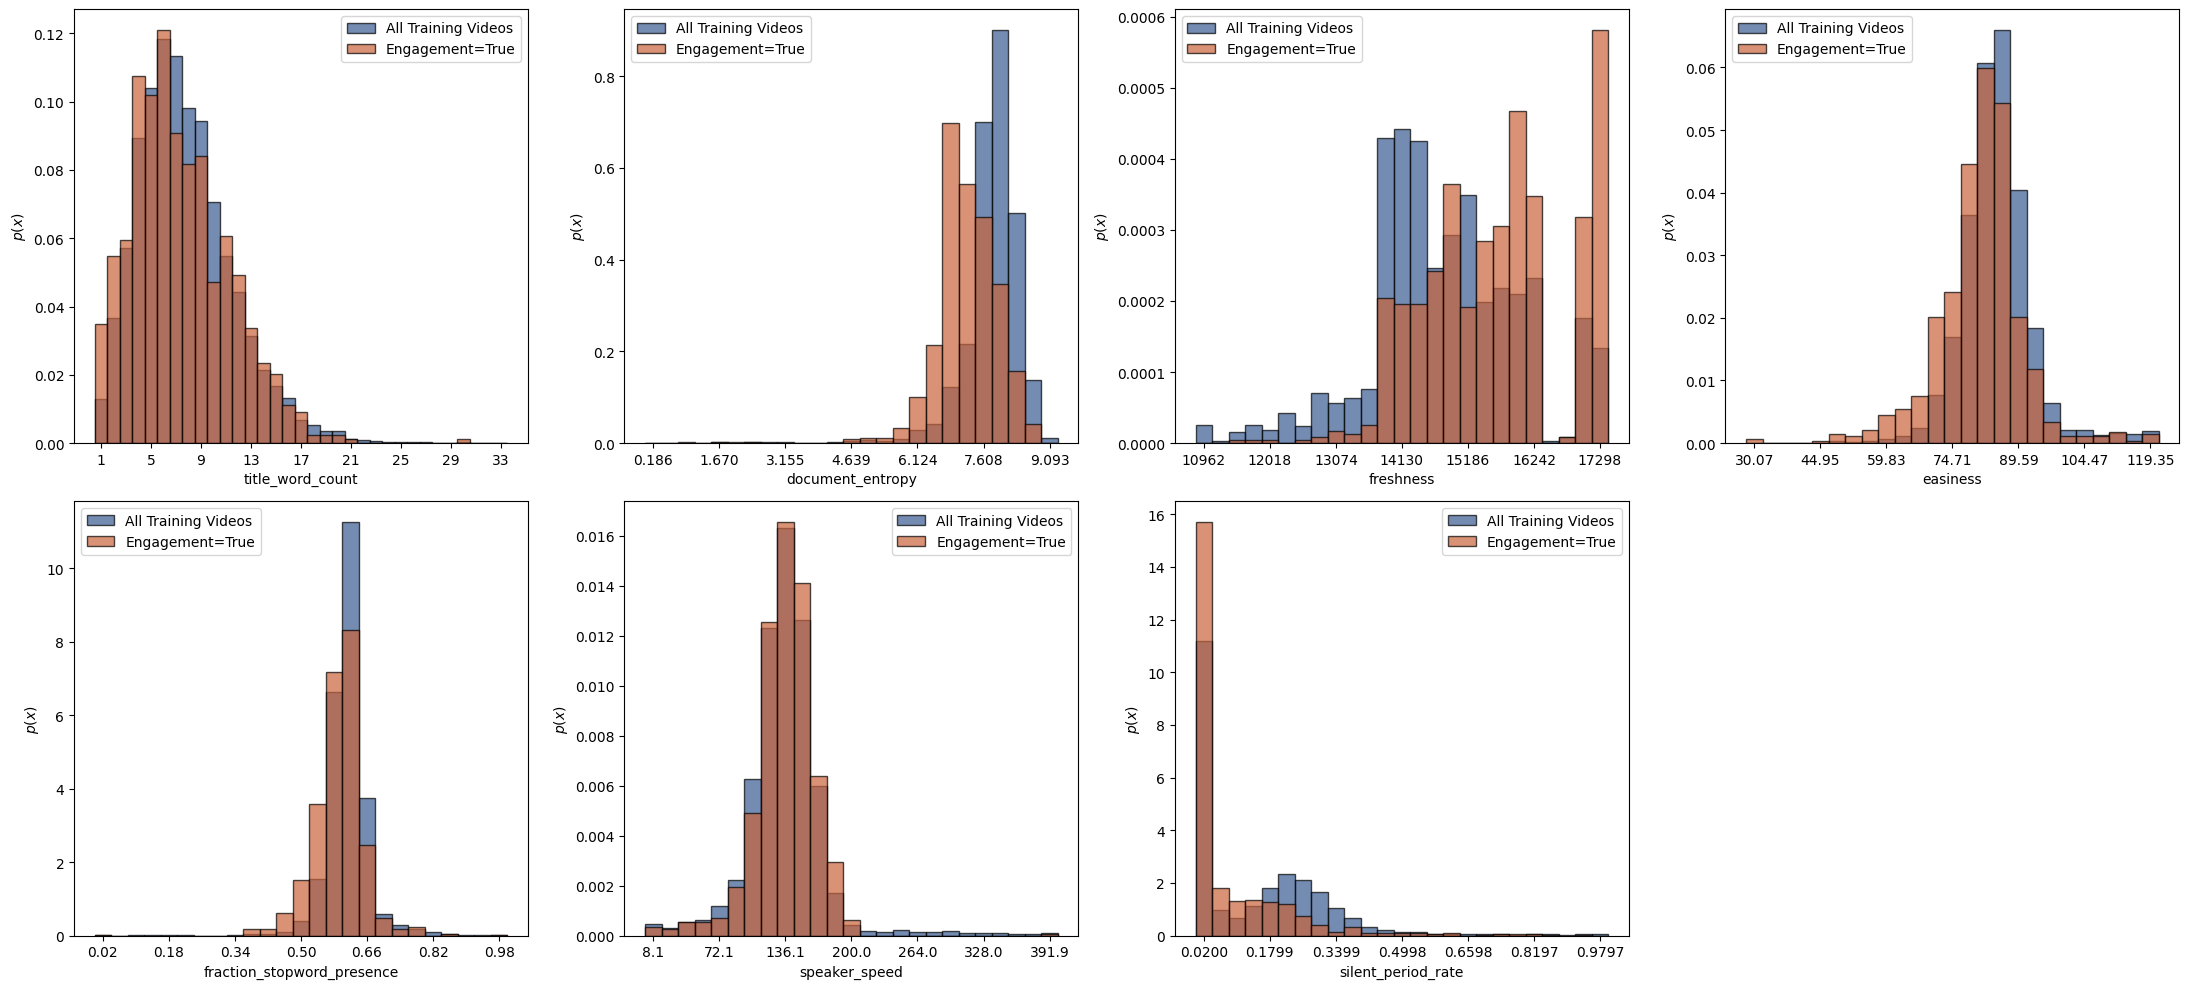

The boxplots are intended to show outliers so will be plotted with the full training dataset


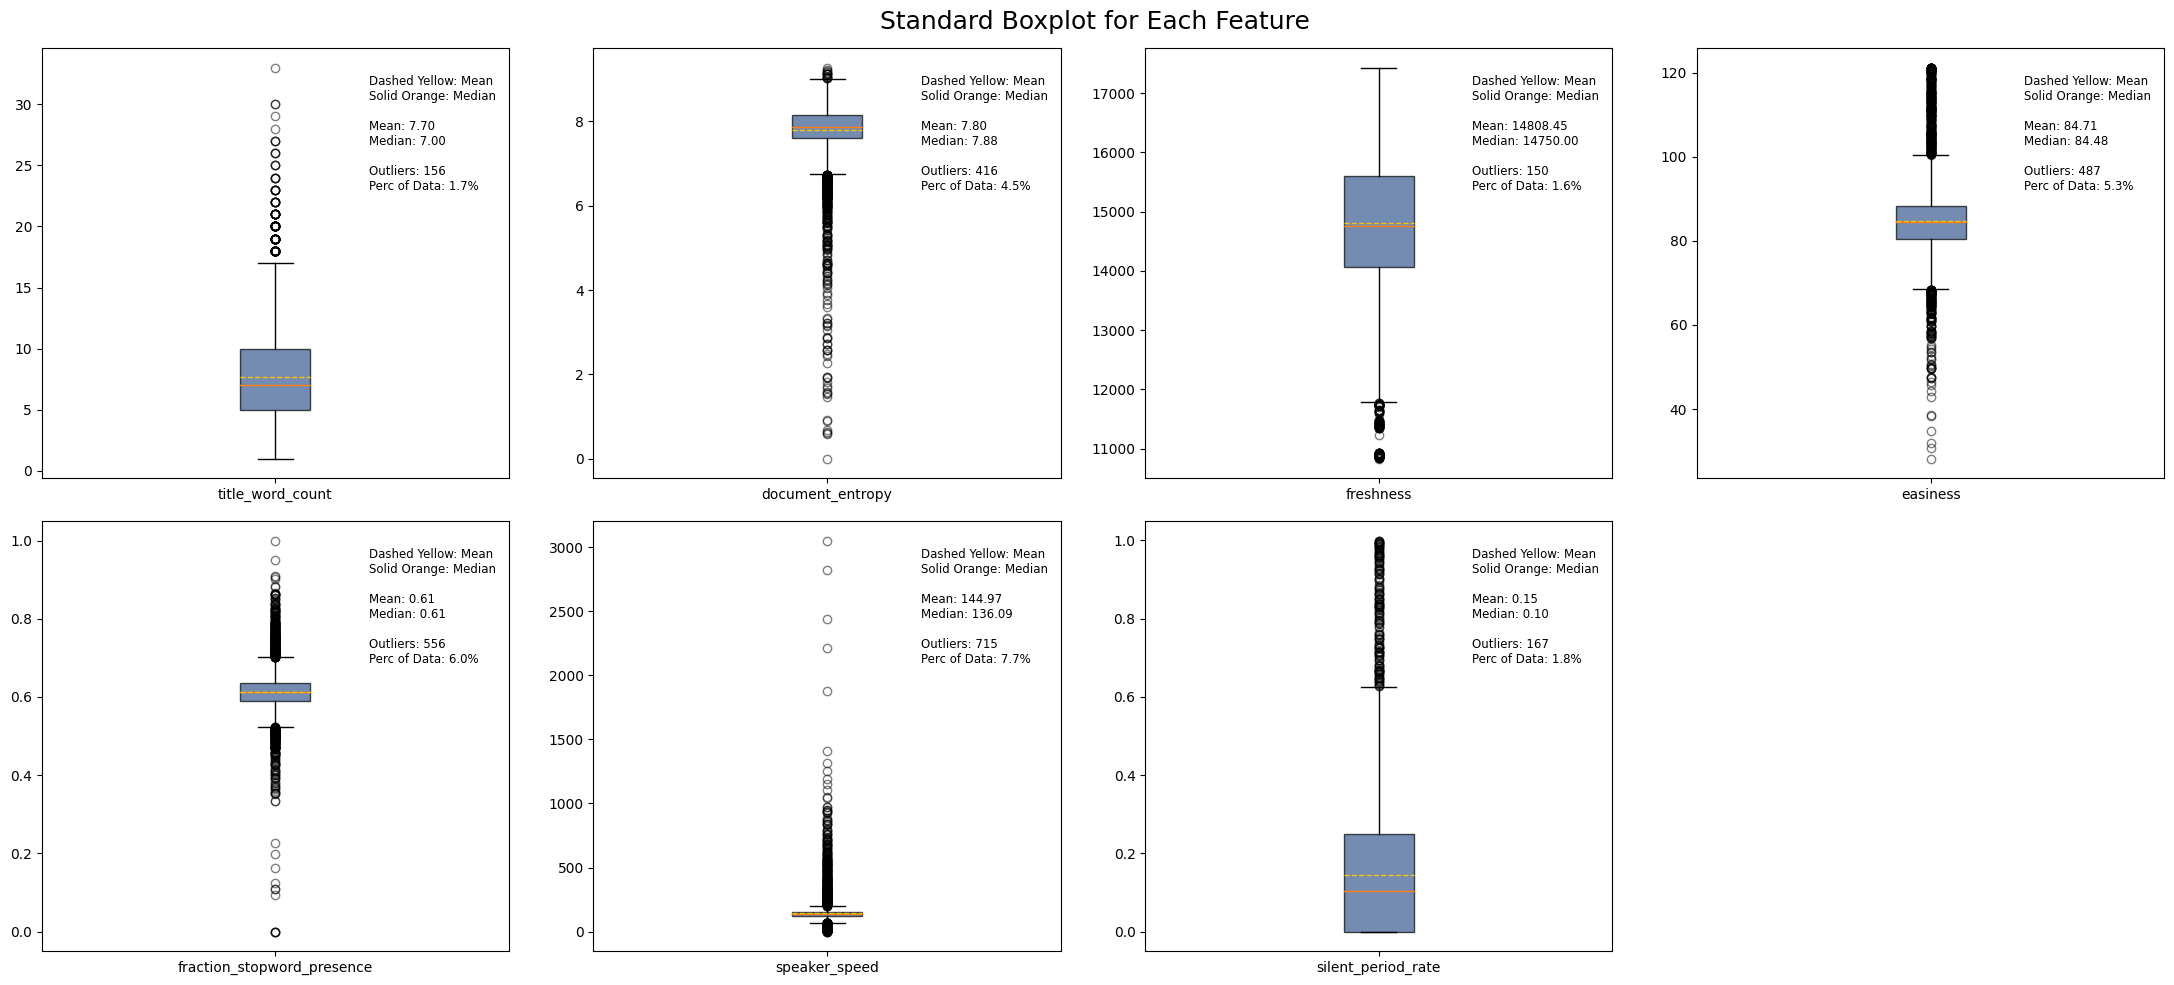

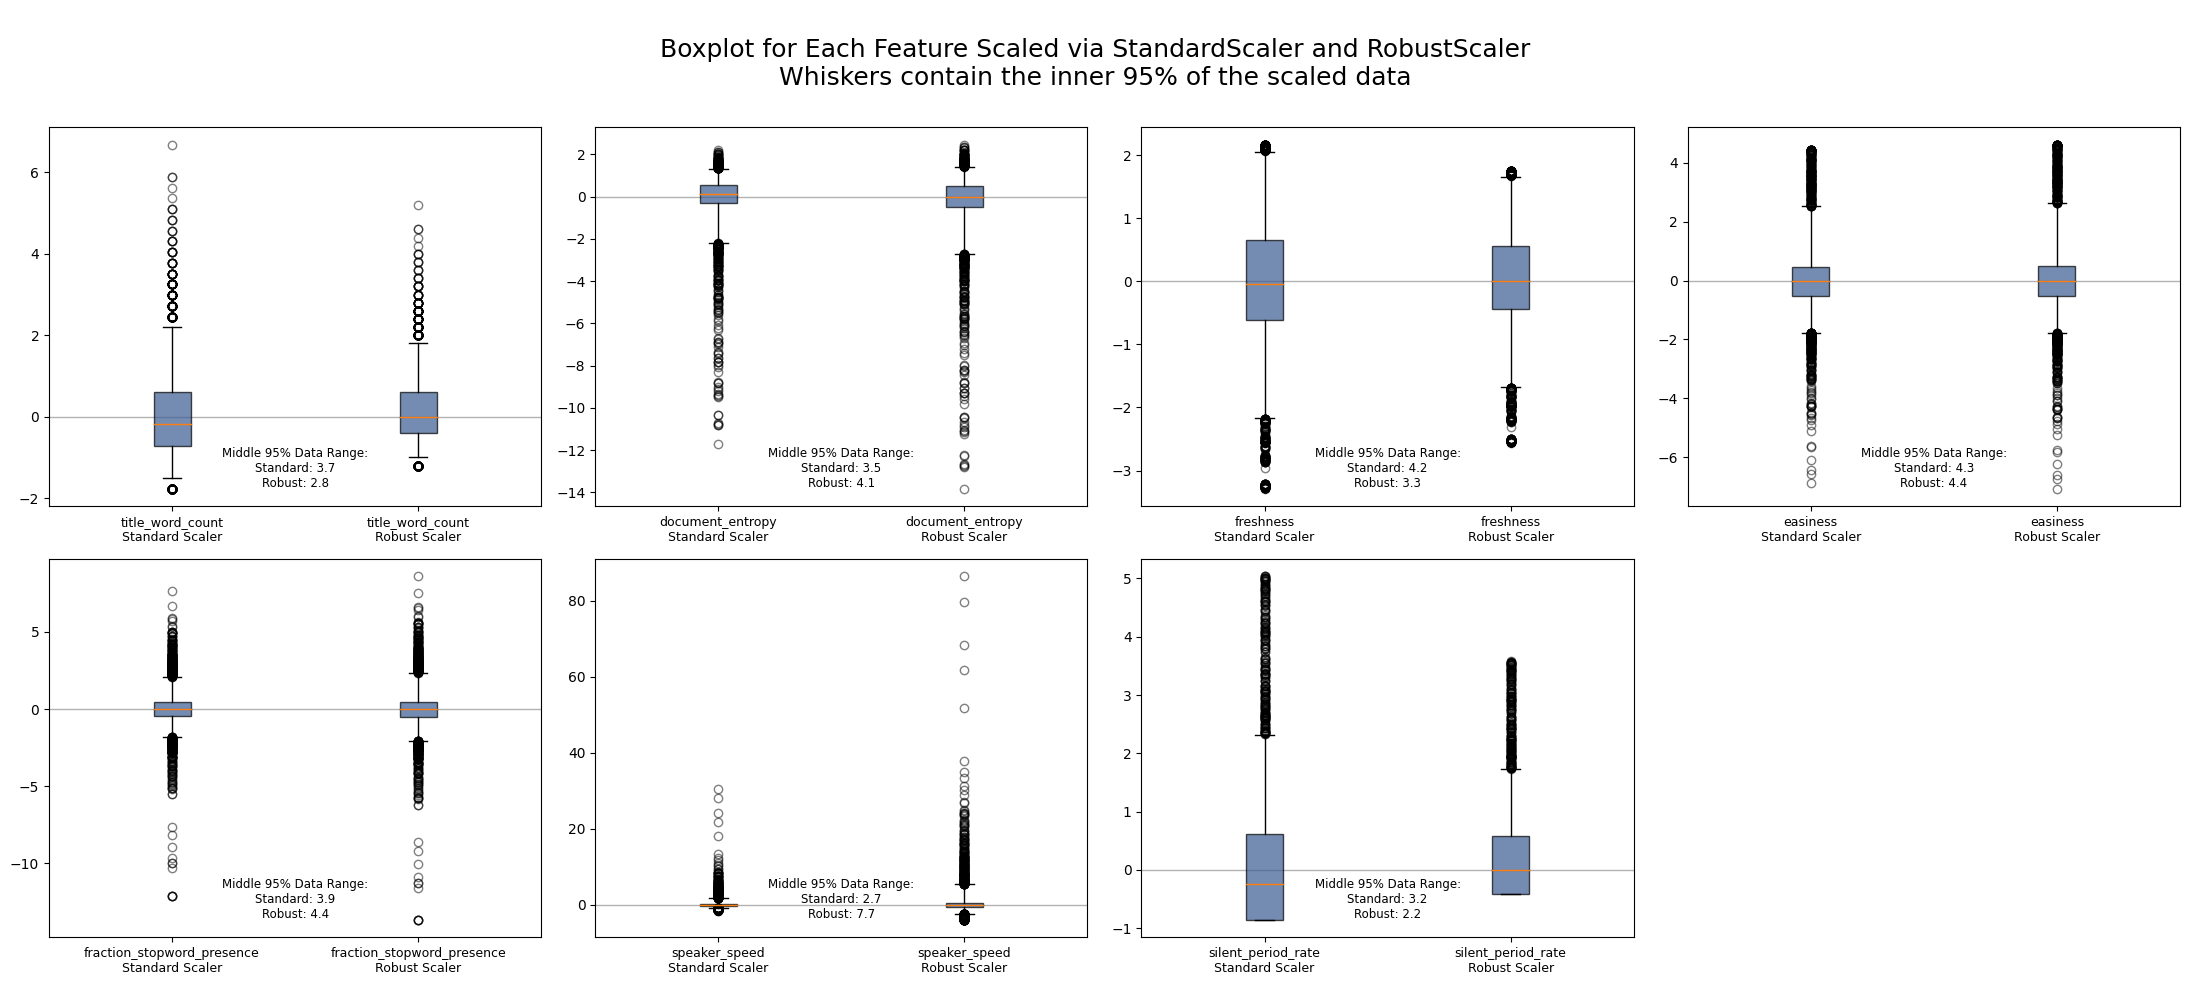

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_scaler,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_train_roc_auc,split1_train_roc_auc,split2_train_roc_auc,split3_train_roc_auc,split4_train_roc_auc,mean_train_roc_auc,std_train_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
0,0.049100,0.003537,0.028335,0.000953,LogisticRegression(),0.0001,StandardScaler(),"{'classifier': LogisticRegression(), 'classifi...",0.851616,0.812351,0.860267,0.839773,0.841039,0.841009,0.016163,22,0.837786,0.849380,0.838291,0.842473,0.841184,0.841823,0.004164,0.913326,0.906284,0.901408,0.896477,0.896477,0.902794,0.006401,17,0.900163,0.901924,0.903143,0.904375,0.904375,0.902796,0.001600
1,0.061042,0.006577,0.027892,0.000983,LogisticRegression(),0.0001,RobustScaler(),"{'classifier': LogisticRegression(), 'classifi...",0.860320,0.825836,0.860342,0.851349,0.844948,0.848559,0.012762,4,0.847852,0.854821,0.847139,0.847011,0.852064,0.849777,0.003130,0.913326,0.906284,0.901408,0.896477,0.896477,0.902794,0.006401,17,0.900163,0.901924,0.903143,0.904375,0.904375,0.902796,0.001600
2,0.040299,0.002610,0.028068,0.001521,LogisticRegression(),0.0005,StandardScaler(),"{'classifier': LogisticRegression(), 'classifi...",0.855598,0.817586,0.861984,0.844287,0.844034,0.844697,0.015187,21,0.842148,0.852287,0.842829,0.846166,0.845177,0.845721,0.003598,0.913868,0.904659,0.900325,0.894851,0.896477,0.902036,0.006817,19,0.900027,0.901382,0.902601,0.903969,0.904239,0.902444,0.001584
3,0.059617,0.005379,0.027216,0.001820,LogisticRegression(),0.0005,RobustScaler(),"{'classifier': LogisticRegression(), 'classifi...",0.860298,0.834142,0.860669,0.853311,0.845246,0.850733,0.010022,2,0.850893,0.856804,0.851057,0.850822,0.854579,0.852831,0.002440,0.913326,0.904659,0.899783,0.894309,0.896477,0.901711,0.006775,20,0.898672,0.900569,0.902059,0.903291,0.903020,0.901522,0.001714
4,0.039161,0.001396,0.025443,0.002071,LogisticRegression(),0.001,StandardScaler(),"{'classifier': LogisticRegression(), 'classifi...",0.857321,0.820968,0.861749,0.846550,0.845259,0.846369,0.014163,8,0.844177,0.853464,0.845181,0.847824,0.847123,0.847554,0.003232,0.913868,0.904659,0.899783,0.894309,0.895393,0.901602,0.007139,21,0.898672,0.900433,0.901924,0.903020,0.903291,0.901468,0.001722
5,0.059088,0.004743,0.026469,0.002165,LogisticRegression(),0.001,RobustScaler(),"{'classifier': LogisticRegression(), 'classifi...",0.860302,0.837483,0.860465,0.856375,0.845566,0.852038,0.009076,1,0.850932,0.857627,0.851471,0.852234,0.854275,0.853308,0.002440,0.913868,0.903034,0.898700,0.893767,0.894851,0.900844,0.007280,22,0.897860,0.900298,0.901517,0.902750,0.902750,0.901035,0.001830
6,0.042973,0.004026,0.026995,0.004094,LogisticRegression(),0.005,StandardScaler(),"{'classifier': LogisticRegression(), 'classifi...",0.857051,0.829426,0.858176,0.851536,0.844625,0.848163,0.010528,6,0.846121,0.854167,0.847710,0.849904,0.848982,0.849377,0.002712,0.918202,0.907909,0.903575,0.899187,0.900813,0.905937,0.006807,16,0.903007,0.906529,0.906529,0.907626,0.907761,0.906291,0.001723
7,0.063453,0.003847,0.024792,0.001846,LogisticRegression(),0.005,RobustScaler(),"{'classifier': LogisticRegression(), 'classifi...",0.857622,0.836305,0.857017,0.855476,0.844034,0.850091,0.008490,3,0.847738,0.855505,0.849228,0.851267,0.850761,0.850900,0.002614,0.918743,0.907909,0.903575,0.899729,0.900813,0.906154,0.006900,15,0.903007,0.906394,0.906258,0.907490,0.907490,0.906128,0.001645
8,0.045362,0.001854,0.026388,0.001227,LogisticRegression(),0.01,StandardScaler(),"{'classifier': LogisticRegression(), 'classifi...",0.855542,0.831195,0.

The "cv_results_" entry for the best model with the best parameters:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_scaler,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_train_roc_auc,split1_train_roc_auc,split2_train_roc_auc,split3_train_roc_auc,split4_train_roc_auc,mean_train_roc_auc,std_train_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
5,0.059088,0.004743,0.026469,0.002165,LogisticRegression(),0.001,RobustScaler(),"{'classifier': LogisticRegression(), 'classifi...",0.860302,0.837483,0.860465,0.856375,0.845566,0.852038,0.009076,1,0.850932,0.857627,0.851471,0.852234,0.854275,0.853308,0.00244,0.913868,0.903034,0.8987,0.893767,0.894851,0.900844,0.00728,22,0.89786,0.900298,0.901517,0.90275,0.90275,0.901035,0.00183


The breakdown of the Pipeline object containing the best predictor


Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier', LogisticRegression(C=0.001))])

/tmp/ipykernel_3621/698716175.py:365: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(feature_names, rotation=30, ha='right')


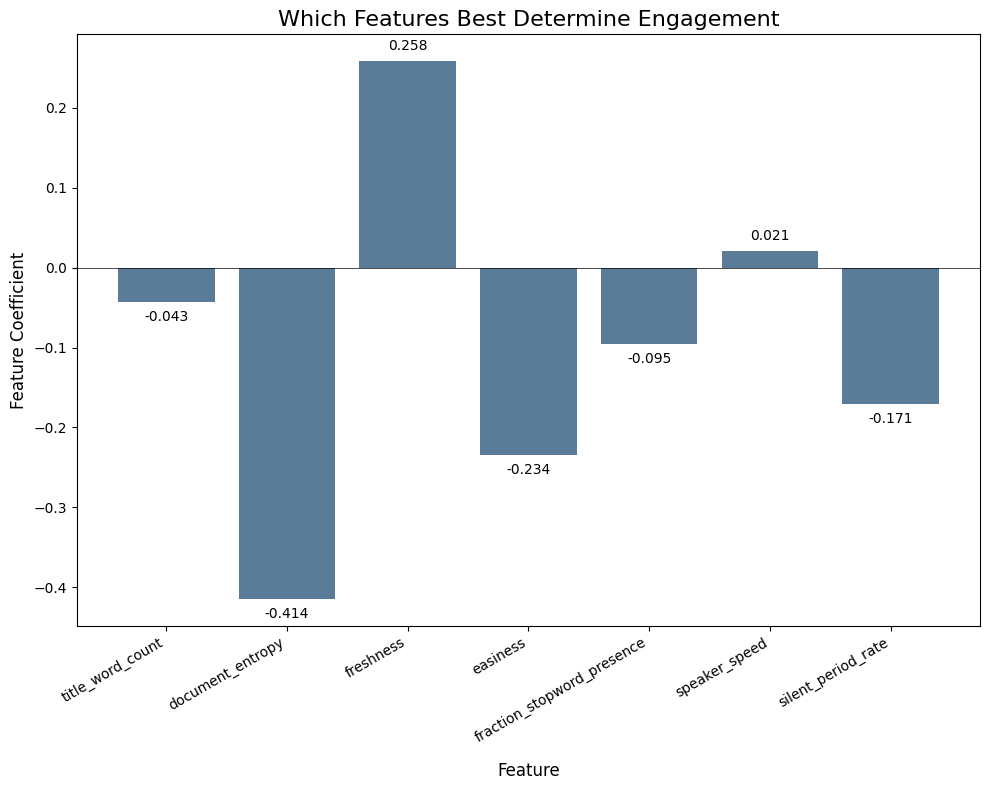

"True" class label index: [1]

Pandas Series giving the probability that each video from the test dataset will be engaging

id
9240     0.038608
9241     0.093674
9242     0.084299
9243     0.248362
9244     0.064127
           ...   
11544    0.073233
11545    0.044931
11546    0.035918
11547    0.257820
11548    0.074073
Name: engagement, Length: 2309, dtype: float64


In [5]:
import textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)  # Do not change this value: required to be compatible with solutions generated by the autograder.

pd.set_option('display.max_columns', None)

def engagement_model():
    train_df = pd.read_csv('train.csv')
    test_df  = pd.read_csv('test.csv')
    
    print('Training DataFrame:')
    print('Shape: {}'.format(train_df.shape))
    display(train_df.head())
    print('Test DataFrame:')
    print('Shape: {}'.format(test_df.shape))
    display(test_df.head())
    
    ## The "normalization_rate" feature is included in both "train.csv" and "test.csv" but is not described above.
    ## There is also no significant mention of this feature in the discussion forum.
    ## Removing this feature from both datasets for now.
    
    train_df = train_df.drop(columns='normalization_rate')
    test_df  = test_df.drop(columns='normalization_rate')
    
    ## Searching the DataFrames for missing entries
    ## Returns a Series where the indexes are the column names of the DataFrame
    ## The Series values are Booleans indicating if the respective columns contain any NA values (None or NaN)
    train_cols_wNA = train_df.isna().any(axis=0) 
    test_cols_wNA  = test_df.isna().any(axis=0)
    
    print('Training DataFrame: Do any columns contain NA values?\n')
    print(train_cols_wNA)
    print('\n\n')
    print('Test DataFrame: Do any columns contain NA values?\n')
    print(test_cols_wNA)
    print('\n\n')
    
    ## Resetting the index of each DataFrame to the "id" column
    train_df = train_df.set_index('id')
    test_df  = test_df.set_index('id')
    
    ## Converting the "speaker_speed" from "words per second" to "words per minute"
    train_df['speaker_speed'] = train_df['speaker_speed'] * 60.
    
    ## See notes in the cells above about conservative cuts made to the dataset due to suspiciously/impossibly high feature values
    print('Training DataFrame summary statistics BEFORE ANY DATA CUTS:')
    display(train_df.describe().round(3))
    
    print(
        textwrap.dedent(
            '''
            Removing the following samples from the training dataset:
            Silent_period_rate > 1: {} Samples
            Easiness > 121.22: {} Samples
            '''
            .format(len(train_df[train_df['silent_period_rate'] > 1.]), 
                    len(train_df[train_df['easiness'] > 121.22])
                   )
        )
    )
    ## Cutting the samples with suspiciously/impossibly high feature values (11 samples)
    train_df = train_df[train_df['silent_period_rate'] <= 1.] ## Cuts 10 samples
    train_df = train_df[train_df['easiness'] <= 121.22] ## Cuts 1 sample
#     train_df = train_df[train_df['speaker_speed'] < 400.] ## Cuts 158 samples
    
    print('Training DataFrame summary statistics AFTER DATA CUTS:')
    display(train_df.describe().round(3))
    
    print(
        textwrap.dedent(
            '''
            For the following histograms and pairplot, for better visualization of the distributions and relationships
            between the features for the overwhelming majority of the data, I will limit the samples to those with a
            "speaker_speed" < 400 words per minute (wpm).
            '''
        )
    )
    
    train_df_lt400wpm = train_df[train_df['speaker_speed'] < 400.]
    
    ## Creating histograms for each feature of the training data.
    ## The blue histograms consider the entirety of the training samples.
    ## the orange histograms only consider the training samples with "True" engagment.
    cols_to_plot = train_df.columns.to_numpy().reshape(2,4)
    
    true_engagement = train_df_lt400wpm[train_df_lt400wpm['engagement'] == True]
    
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(22,10))
    for row in range(cols_to_plot.shape[0]):
        for col in range(cols_to_plot.shape[1]):
            feature = cols_to_plot[row, col]
            to_plot_all_feat_vals = train_df_lt400wpm[feature]
            to_plot_true_eng_only = true_engagement[feature]
            
            if feature == 'engagement':
                axs[row, col].axis('off')
            else:
                if feature == 'title_word_count':
                    bins = np.arange(to_plot_all_feat_vals.min()-0.5, to_plot_all_feat_vals.max()+1.5)
                else:
                    bins = 25
                    
                _, binedges, _ = axs[row, col].hist(
                    to_plot_all_feat_vals,
                    bins=bins,
                    density=True,
                    color='xkcd:denim blue',
                    alpha=0.7,
                    edgecolor='black',
                    label='All Training Videos'
                )
                
                axs[row, col].hist(
                    to_plot_true_eng_only,
                    bins=binedges,
                    density=True,
                    color='xkcd:terra cotta',
                    alpha=0.7,
                    edgecolor='black',
                    label='Engagement=True'
                )
                
                binwidth = binedges[1] - binedges[0]
                bincenters = np.arange(binedges[0]+binwidth/2., binedges[-1]+binwidth/2., binwidth)
                
                axs[row, col].set_xticks(bincenters[::4])
                axs[row, col].set_xlabel(feature)
                axs[row, col].set_ylabel(r'$p(x)$')
                axs[row, col].legend(loc='best')
                
#                 print(bincenters)
                
    plt.tight_layout()
    plt.show()
    
    ## Creating scatter pairplot of the features with KDE plots along the main diagonal
    ## Color-coded by "True" or "False" engagement
    pairplot = sns.pairplot(
        train_df_lt400wpm,
        hue='engagement',
        palette={False: 'xkcd:denim blue', True: 'xkcd:terra cotta'},
        kind='scatter',
        diag_kind='kde',
        markers='o',
        plot_kws={'alpha': 0.3},
        diag_kws={'common_norm': False} ## Each density is normalized independently
    )
    
    plt.show()
    
    print('The boxplots are intended to show outliers so will be plotted with the full training dataset')
    
    ## Creating a boxplot for each feature of the training data (all samples are considered)
    ## This will help to show which features have a significant number of outliers
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(22,10))
    for row in range(cols_to_plot.shape[0]):
        for col in range(cols_to_plot.shape[1]):
            feature = cols_to_plot[row, col]
            samples = train_df[feature]
            
            if feature == 'engagement':
                axs[row, col].axis('off')
            else:
                whis = 1.5
                q1   = np.percentile(samples, 25)
                q3   = np.percentile(samples, 75)
                iqr  = q3 - q1
                num_outliers = len(samples[(samples < q1 - whis*iqr) | (samples > q3 + whis*iqr)])
                
                axs[row, col].boxplot(
                    samples,
                    whis=whis,
                    labels=[feature], 
                    patch_artist=True,
                    boxprops={'facecolor': 'xkcd:denim blue', 'alpha': 0.7},
                    flierprops={'alpha': 0.5},
                    meanline=True,
                    showmeans=True,
                    meanprops={'color': 'xkcd:goldenrod'}
                )
                
                axs[row, col].text(
                    0.70, 
                    0.80, 
                    textwrap.dedent(
                        '''
                        Dashed Yellow: Mean
                        Solid Orange: Median
                        
                        Mean: {:.2f}
                        Median: {:.2f}
                        
                        Outliers: {}
                        Perc of Data: {:.1f}%
                        '''
                        .format(
                            np.mean(samples),
                            np.median(samples),
                            num_outliers, 
                            num_outliers/len(samples)*100.,
                        )
                    ),
                    ha='left',
                    va='center',
                    transform=axs[row,col].transAxes,
                    fontsize=8.5
                )
                
    fig.suptitle('Standard Boxplot for Each Feature', fontsize=18)
    plt.tight_layout()
    plt.show()
    
    ## Given the many outliers that exist for many of the features,
    ## I am plotting boxplots of each feature scaled separately via 
    ## StandardScaler and RobustScaler to see if there is an appreciable
    ## difference in the scaled results.
    ## I do not anticipate large differences given the outliers are not 
    ## very extreme and, as such, the mean and median of each feature are generally similar
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(22,10))
    for row in range(cols_to_plot.shape[0]):
        for col in range(cols_to_plot.shape[1]):
            feature = cols_to_plot[row, col]
            samples = train_df[feature]
            
            if feature == 'engagement':
                axs[row, col].axis('off')
            else:
                standard_scaler = StandardScaler()
                robust_scaler = RobustScaler()
                
                samples_ss = standard_scaler.fit_transform(pd.DataFrame(samples))
                samples_rs = robust_scaler.fit_transform(pd.DataFrame(samples))
                
                range_95_ss = np.percentile(samples_ss, 97.5) - np.percentile(samples_ss, 2.5)
                range_95_rs = np.percentile(samples_rs, 97.5) - np.percentile(samples_rs, 2.5)
                
                axs[row, col].boxplot(
                    [samples_ss.flatten(), samples_rs.flatten()],
                    whis=(2.5, 97.5),
                    labels=[feature+'\n'+'Standard Scaler', feature+'\n'+'Robust Scaler'], 
                    patch_artist=True,
                    boxprops={'facecolor': 'xkcd:denim blue', 'alpha': 0.7},
                    flierprops={'alpha': 0.5}
                )
                
                axs[row, col].axhline(y = 0, linestyle='-', linewidth=1, color='black', alpha=0.3, zorder=1)
                
                axs[row, col].text(
                    0.5, 
                    0.1,
                    textwrap.dedent(
                        '''
                        Middle 95% Data Range:
                        Standard: {:.1f}
                        Robust: {:.1f}
                        '''
                        .format(range_95_ss, range_95_rs)
                    ),
                    ha='center',
                    va='center',
                    transform=axs[row,col].transAxes,
                    fontsize=8.5
                )
                
                axs[row, col].xaxis.set_tick_params(labelsize=9)
    
    fig.suptitle(
        textwrap.dedent(
            '''
            Boxplot for Each Feature Scaled via StandardScaler and RobustScaler
            Whiskers contain the inner 95% of the scaled data
            '''
        ),
        fontsize=18
    )
    plt.tight_layout()
    plt.show()
    
    ## Using GridSearchCV and a Pipeline to find the best prediction model and preprocess scaling of the data (if necessary)
    pipe = Pipeline(
        [
            ('scaler', 'passthrough'), ## Can be left as "passthrough" for RandomForestClassifier due to its insensitivity to preprocessing
            ('classifier', 'passthrough')
        ]
    )
    
    param_grid = [
        {
            'scaler': [StandardScaler(), RobustScaler()], ## Testing RobustScaler due to presence of (not-too-extreme) outliers
            'classifier': [LogisticRegression()], ## A sensible choice for a binary classification problem that will ultimately return
                                                  ## class membership probabilities for the test data
            'classifier__C': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]
        },
        {
            'classifier': [RandomForestClassifier(n_jobs=6)], ## Considered here since creators of the VLE dataset find RF to perform the best 
                                                              ## Due to relatively small sample size and feature selection
                                                              ## I am going to stick with the default 100 trees (n_estimators) for now
            'classifier__max_depth': [8, 10, 12, 14],  
            'classifier__max_features': [1, 2, 3, 4]  ## The default is "sqrt" which would correspond to "max(1, int(np.sqrt(7))) = 2" - see source code
                                                      ## The lower the number, the smaller the subset of features to consider at each split point
                                                      ## The lower the number, the more diverse the individual trees should be
        }
    ]
    
    grid = GridSearchCV(
        pipe, 
        param_grid=param_grid, 
        scoring=['roc_auc', 'accuracy'], 
        refit='roc_auc', 
        return_train_score=True
    )
    
    X = train_df.iloc[:,:-1] ## The last column is the target column
    y = train_df['engagement']
    
    grid.fit(X, y)
    
    display(pd.DataFrame(grid.cv_results_))
    
    print('The "cv_results_" entry for the best model with the best parameters:')
    best_result = pd.DataFrame(grid.cv_results_).iloc[[grid.best_index_]]
    display(best_result)
    
    best_pipe = grid.best_estimator_

    print('The breakdown of the Pipeline object containing the best predictor')
    display(best_pipe)
    
    ## Creating a plot of the feature coefficients if the best prediction algorithm is Logistic Regression
    ## Otherwise creating a plot of the feature importances if the best algorithm is Random Forest
    ## Tells me which features are most important to the predictions
    if isinstance(best_pipe.named_steps['classifier'], LogisticRegression):  ## Checks if the Pipeline classifier is this class
        feature_import_measure = best_pipe.named_steps['classifier'].coef_.flatten()
        fig_ylabel = 'Feature Coefficient'
        feature_names = best_pipe.feature_names_in_
    elif isinstance(best_pipe.named_steps['classifier'], RandomForestClassifier):
        feature_import_measure = best_pipe.named_steps['classifier'].feature_importances_
        fig_ylabel = 'Feature Importance'
        feature_names = best_pipe.named_steps['classifier'].feature_names_in_  ## I believe I have to do it this way due to the 
                                                                               ## "passthrough" of the scaler initial Pipeline step
    fig, ax = plt.subplots(figsize=(10,8))
    bars = ax.bar(feature_names, feature_import_measure, color='xkcd:slate blue')
    ax.axhline(y = 0, linestyle='-', linewidth=0.5, color='black')
    
    for bar, value in zip(bars, feature_import_measure):
        if value >= 0.:
            va  = 'bottom'
            pad = 0.01 
        else:
            va  = 'top'
            pad = -0.01

        ax.text(bar.get_x()+bar.get_width()/2., bar.get_height()+pad, '{:.3f}'.format(value), ha='center', va=va)
        
    ax.set_xticklabels(feature_names, rotation=30, ha='right')
    ax.set_xlabel('Feature', fontsize=12, labelpad=12)
    ax.set_ylabel(fig_ylabel, fontsize=12)
    ax.set_title('Which Features Best Determine Engagement', fontsize=16)
    
    plt.tight_layout()
    plt.show()
    
    ## Estimating the probability that each video from the test dataset will be engaging ("engagement" = True)
    true_class_idx  = np.where(best_pipe.classes_ == True)[0]
    print('"True" class label index: {}'.format(true_class_idx))
    print()
    test_data_probs = pd.Series(
        best_pipe.predict_proba(test_df)[:,true_class_idx].flatten(), 
        index=test_df.index, 
        name='engagement'
    )
    
    print('Pandas Series giving the probability that each video from the test dataset will be engaging\n')
    print(test_data_probs)
    
    return train_df, test_df, best_pipe, test_data_probs

train_df, test_df, best_pipe, test_data_probs = engagement_model()

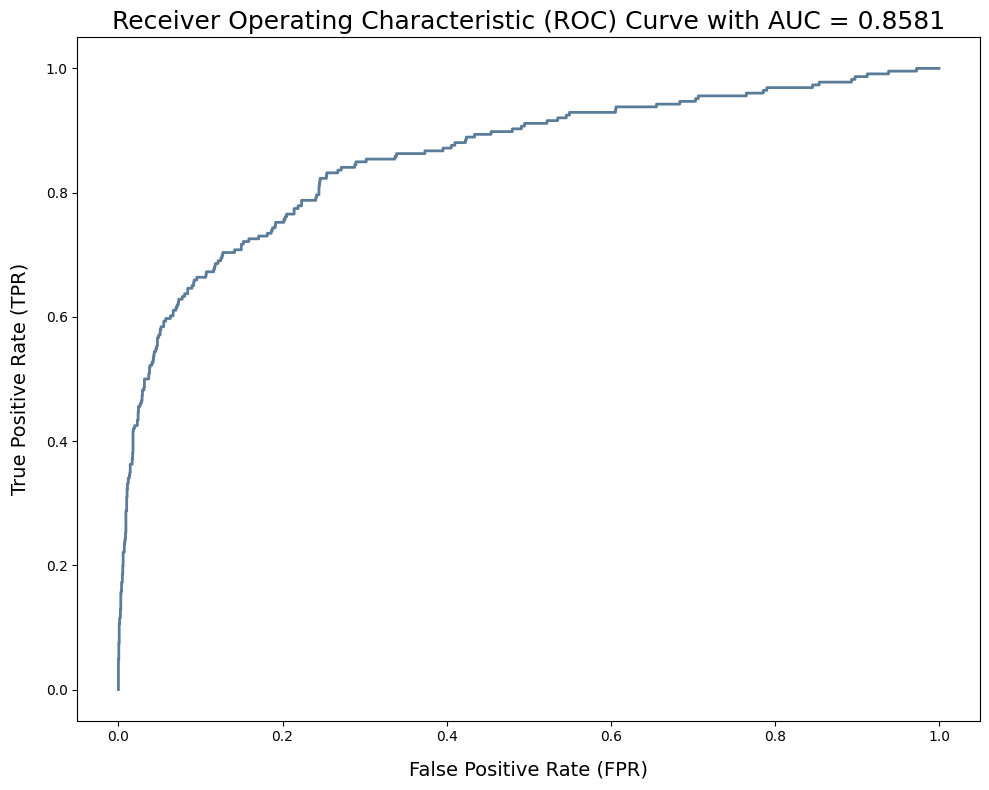

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score

## Computing the ROC Area Under the Curve (ROC AUC) for the test data
roc_auc = roc_auc_score(test_portion['engagement'], test_data_probs)

## Generating the Receiver Operating Characteristic (ROC) curve for the test data
fpr, tpr, thresholds = roc_curve(
    test_portion['engagement'], 
    test_data_probs, 
    pos_label=True, 
    drop_intermediate=False
)

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(fpr, tpr, linestyle='-', color='xkcd:slate blue', linewidth=2)
ax.set_xlabel('False Positive Rate (FPR)', fontsize=14, labelpad=12)
ax.set_ylabel('True Positive Rate (TPR)', fontsize=14, labelpad=12)
ax.set_title(
    'Receiver Operating Characteristic (ROC) Curve with AUC = {:.4f}'.format(roc_auc), 
    fontsize=18
)

plt.tight_layout()
plt.show()

In [ ]:
## Showing only the training samples with "speaker_speed" < 400 wpm
## This is to better visualize the density plots of the vast majority of the data (excluding high "speaker_speed" outliers)
pairplot = sns.pairplot(
    train_df[train_df['speaker_speed'] < 400.],
    hue='engagement',
    palette={False: 'xkcd:denim blue', True: 'xkcd:terra cotta'},
    kind='kde',
    diag_kind='kde',
    markers='o',
    plot_kws={'alpha': 0.5}
)
    
plt.show()

In [ ]:
print(train_df['engagement'].equals(train_portion['engagement']))
print()
print(train_df['engagement'].compare(train_portion['engagement']))

display(train_df['engagement'])
display(train_portion['engagement'])

In [ ]:
print(train_df['speaker_speed'].round(5).equals(train_portion['speaker_speed_test'].round(5)))
print()
print(train_df['speaker_speed'].round(5).compare(train_portion['speaker_speed_test'].round(5)))

display(train_df['speaker_speed'])
display(train_portion['speaker_speed_test'])